### **Lasso Regression – House Price Prediction**

Lasso Regression **applies L1 regularization**, which helps in **feature selection by shrinking some feature coefficients to zero.**

### **DATASET LOADING**

The **same housing dataset is reused** to ensure **consistent comparison across regression models.**

In [1]:
import pandas as pd

# Load training and testing datasets
train_df = pd.read_csv("/content/california_housing_train.csv")
test_df = pd.read_csv("/content/california_housing_test.csv")

# Preview data
train_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerHousehold,MedHouseVal
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.359130,1.030
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,2.573820,3.821
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,2.073224,1.726
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,1.002116,0.934
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,2.725400,0.965


### **FEATURE & TARGET SEPARATION**

Features are used as inputs to the model, while the target represents the house price to be predicted.

In [2]:
# Separate features and target (training data)
X_train = train_df.drop("MedHouseVal", axis=1)
y_train = train_df["MedHouseVal"]

# Separate features and target (testing data)
X_test = test_df.drop("MedHouseVal", axis=1)
y_test = test_df["MedHouseVal"]

# Check shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((16512, 9), (16512,), (4128, 9), (4128,))

### **FEATURE SCALING**

Feature scaling ensures Lasso regularization treats all features equally.

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


### **TRAIN THE LASSO MODEL**

Lasso Regression applies **L1 regularization,** which can **eliminate less important features** by setting their **coefficients to zero**.

In [4]:
from sklearn.linear_model import Lasso

# Initialize Lasso model
lasso_model = Lasso(alpha=0.01)

# Train model
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.01)

### **MODEL PREDICTION**

The trained Lasso model is used to predict house prices for unseen test data.

In [5]:
# Predict on test data
y_pred_lasso = lasso_model.predict(X_test_scaled)

# View first 5 predictions
y_pred_lasso[:5]


array([0.35260284, 1.83199453, 3.61920471, 2.7159771 , 2.60346028])

### **MODEL EVALUATION**

Evaluation metrics help measure prediction accuracy and overall model performance.

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.5036292009621796
MSE: 0.46788869300515684
RMSE: 0.6840238979781019
R2 Score: 0.6429445304676917


### **Actual vs Predicted Visualization**

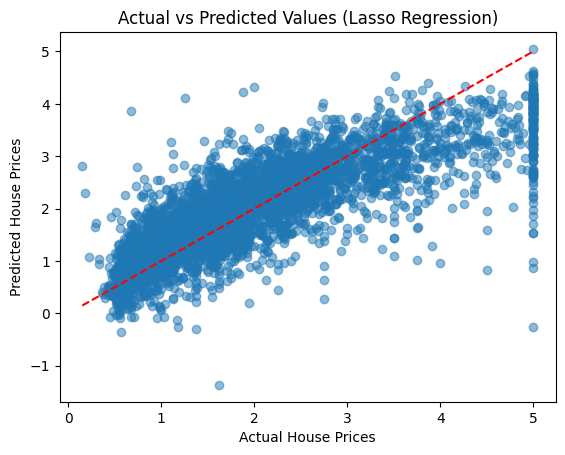

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Values (Lasso Regression)")
plt.show()
